In [23]:
import pandas as pd 

In [24]:
dataComun = pd.read_excel("COMUNIZAÇÃO EMBALAGENS PAPELÃO.xlsx")
display(dataComun)

,Rótulos de Linha,Qtd PNs,Soma de Valor estoque,Soma de Demanda anual Qtde - 2023,Soma de Spend Anual BRL
0,101x101x95,1,2214.315500,650,1257.035000
1,101x101x115,1,3686.280000,7122,7869.810000
2,101x101x130,1,1575.174688,1952,2765.054848
3,115x115x140,1,3678.164080,2990,3715.442770
4,100x100x142,1,406.811922,2674,3143.974218
...,...,...,...,...,...
258,1120x1120x668,1,2125.999116,35,5733.546700
259,1120x1120x808,1,11840.914800,10,7400.571750
260,1165x970x740,1,8006.466043,4727,241060.923473
261,1200x720x818,1,0.000000,1340,68029.314300


In [25]:
# Check for missing values
missing_values = dataComun.isnull().sum()

# Display missing values
missing_values


Rótulos de Linha                     0
Qtd PNs                              0
Soma de Valor estoque                0
Soma de Demanda anual Qtde - 2023    0
Soma de Spend Anual BRL              0
dtype: int64

In [26]:
# Normalize the numerical columns for clustering
from sklearn.preprocessing import StandardScaler

# Selecting the numerical columns for clustering
numerical_cols = ['Soma de Valor estoque', 'Soma de Demanda anual Qtde - 2023', 'Soma de Spend Anual BRL']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(dataComun[numerical_cols]), columns=numerical_cols)

# Display the first few rows of the scaled data
df_scaled.head()


,Soma de Valor estoque,Soma de Demanda anual Qtde - 2023,Soma de Spend Anual BRL
0,0.202859,-0.310235,-0.331869
1,0.665590,-0.080742,-0.233095
2,0.001937,-0.264067,-0.309344
3,0.663038,-0.227260,-0.295148
4,-0.365353,-0.238465,-0.303684


c:\Users\458774\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\458774\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\458774\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\458774\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

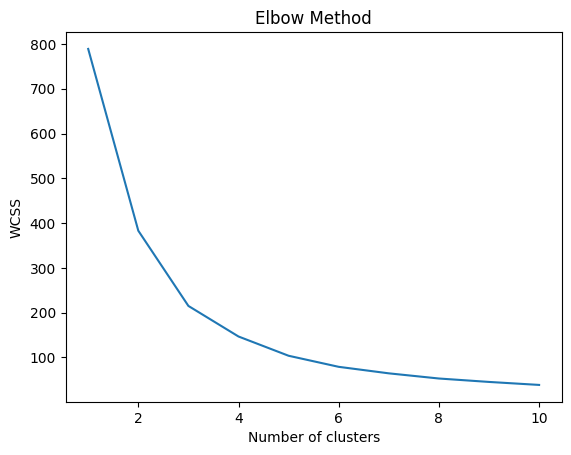

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [28]:
# Apply K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
dataComun['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the first few rows with cluster labels
dataComun.head()


c:\Users\458774\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Rótulos de Linha,Qtd PNs,Soma de Valor estoque,Soma de Demanda anual Qtde - 2023,Soma de Spend Anual BRL,Cluster
0,101x101x95,1,2214.315500,650,1257.035000,0
1,101x101x115,1,3686.280000,7122,7869.810000,0
2,101x101x130,1,1575.174688,1952,2765.054848,0
3,115x115x140,1,3678.164080,2990,3715.442770,0
4,100x100x142,1,406.811922,2674,3143.974218,0


In [29]:
# Apply K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
dataComun['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the first few rows with cluster labels
print(dataComun.head())


  Rótulos de Linha  Qtd PNs  Soma de Valor estoque  \
0       101x101x95        1            2214.315500   
1      101x101x115        1            3686.280000   
2      101x101x130        1            1575.174688   
3      115x115x140        1            3678.164080   
4      100x100x142        1             406.811922   

   Soma de Demanda anual Qtde - 2023  Soma de Spend Anual BRL  Cluster  
0                                650              1257.035000        0  
1                               7122              7869.810000        0  
2                               1952              2765.054848        0  
3                               2990              3715.442770        0  
4                               2674              3143.974218        0  


c:\Users\458774\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
#Calculate cluster Avarage
cluster_summary = dataComun.groupby('Cluster').mean()
print(cluster_summary)


          Qtd PNs  Soma de Valor estoque  Soma de Demanda anual Qtde - 2023  \
Cluster                                                                       
0        1.098655             650.844204                        2173.798206   
1        1.500000            4164.146779                      115105.500000   
2        1.500000           23650.598686                      226199.000000   
3        1.468750            6100.819766                       26379.781250   

         Soma de Spend Anual BRL  
Cluster                           
0                    5496.658274  
1                  211850.703696  
2                  593368.457233  
3                   77825.789434  


C:\Users\458774\AppData\Local\Temp\ipykernel_18868\2100636437.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = dataComun.groupby('Cluster').mean()


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'dataComun' is already loaded
# Ensure 'Rótulos de Linha' is treated as a string
dataComun['Rótulos de Linha'] = dataComun['Rótulos de Linha'].astype(str)

# Check if 'Rótulos de Linha' column exists
if 'Rótulos de Linha' in dataComun.columns:
    # Handle rows with incorrect format
    # Only keep rows where 'Rótulos de Linha' has exactly 3 parts
    dataComun = dataComun[dataComun['Rótulos de Linha'].apply(lambda x: len(x.split('x')) == 3)]

    # Split 'Rótulos de Linha' into separate features
    dataComun[['Length', 'Width', 'Height']] = dataComun['Rótulos de Linha'].str.split('x', expand=True).astype(float)

    # Normalize the new and existing numerical columns
    scaler = StandardScaler()
    numerical_cols = ['Soma de Valor estoque', 'Soma de Demanda anual Qtde - 2023', 'Soma de Spend Anual BRL']
    df_scaled = pd.DataFrame(scaler.fit_transform(dataComun[['Length', 'Width', 'Height'] + numerical_cols]), columns=['Length', 'Width', 'Height'] + numerical_cols)

    # Apply K-Means with 4 clusters
    kmeans = KMeans(n_clusters=4, random_state=42)
    dataComun['Cluster'] = kmeans.fit_predict(df_scaled)

    # Summarize the clusters by their dimensions
    cluster_summary_sizes = dataComun.groupby('Cluster')[['Length', 'Width', 'Height']].mean()
    print("Cluster Summary by Box Sizes:")
    print(cluster_summary_sizes)

    # Summarize the clusters by their demand and spend
    cluster_summary_demand_spend = dataComun.groupby('Cluster')[numerical_cols].mean()
    print("Cluster Summary by Demand and Spend:")
    print(cluster_summary_demand_spend)

    # Detailed analysis of each cluster
    for cluster in range(4):
        print(f"\nCluster {cluster} Analysis:")
        cluster_data = dataComun[dataComun['Cluster'] == cluster]
        print(f"Box Sizes (Length, Width, Height):")
        print(cluster_data[['Length', 'Width', 'Height']].describe())
        print(f"Demand and Spend:")
        print(cluster_data[numerical_cols].describe())
else:
    print("Column 'Rótulos de Linha' not found in the DataFrame.")


Cluster Summary by Box Sizes:
              Length       Width      Height
Cluster                                     
0         190.645161  170.725806  333.177419
1        1146.428571  867.142857  712.000000
2         425.776000  323.696000  319.832000
3         269.333333  246.833333  337.000000
Cluster Summary by Demand and Spend:
         Soma de Valor estoque  Soma de Demanda anual Qtde - 2023  \
Cluster                                                             
0                   968.324935                        9314.879032   
1                  3543.782851                         902.571429   
2                  1575.747546                        2555.376000   
3                 11565.032129                      164575.833333   

         Soma de Spend Anual BRL  
Cluster                           
0                   16167.341723  
1                   46770.708032  
2                   13086.552853  
3                  364619.169034  

Cluster 0 Analysis:
Box Sizes (Length

C:\Users\458774\AppData\Local\Temp\ipykernel_18868\3840357327.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataComun[['Length', 'Width', 'Height']] = dataComun['Rótulos de Linha'].str.split('x', expand=True).astype(float)
C:\Users\458774\AppData\Local\Temp\ipykernel_18868\3840357327.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataComun[['Length', 'Width', 'Height']] = dataComun['Rótulos de Linha'].str.split('x', expand=True).astype(float)
C:\Users\458774\AppData\Local\Temp\ipykernel_18868\3

In [34]:
# Summarize the clusters by their dimensions
cluster_summary_sizes = dataComun.groupby('Cluster')[['Length', 'Width', 'Height']].mean()
print("Cluster Summary by Box Sizes:")
print(cluster_summary_sizes)

# Summarize the clusters by their demand and spend
cluster_summary_demand_spend = dataComun.groupby('Cluster')[numerical_cols].mean()
print("Cluster Summary by Demand and Spend:")
print(cluster_summary_demand_spend)

# Detailed analysis of each cluster
for cluster in range(4):
    print(f"\nCluster {cluster} Analysis:")
    cluster_data = dataComun[dataComun['Cluster'] == cluster]
    print(f"Box Sizes (Length, Width, Height):")
    print(cluster_data[['Length', 'Width', 'Height']].describe())
    print(f"Demand and Spend:")
    print(cluster_data[numerical_cols].describe())


Cluster Summary by Box Sizes:
              Length       Width      Height
Cluster                                     
0         190.645161  170.725806  333.177419
1        1146.428571  867.142857  712.000000
2         425.776000  323.696000  319.832000
3         269.333333  246.833333  337.000000
Cluster Summary by Demand and Spend:
         Soma de Valor estoque  Soma de Demanda anual Qtde - 2023  \
Cluster                                                             
0                   968.324935                        9314.879032   
1                  3543.782851                         902.571429   
2                  1575.747546                        2555.376000   
3                 11565.032129                      164575.833333   

         Soma de Spend Anual BRL  
Cluster                           
0                   16167.341723  
1                   46770.708032  
2                   13086.552853  
3                  364619.169034  

Cluster 0 Analysis:
Box Sizes (Length

In [36]:
dataComun.to_excel("Data_comunization_clustered.xlsx")